# Introduction


##<h2>Title</h2>
Bank Marketing Campaign - Customer Bank Clustering.

selamat datang di project saya, saya Irvan Sikajudin, seorang Data Science enthusiast, project ini berisikan beberapa proses, mulai dari Data Understanding, EDA, Deep dive EDA, Data Prepocessing, kemudian segmentasi dengan algoritma K-means clustering, agglomerative clustering dan juga K-prototypes Clustering.

##<h2>Context and Source</h2>

<h2>Context</h2>
Temukan strategi terbaik untuk ditingkatkan untuk kampanye pemasaran berikutnya. Bagaimana lembaga keuangan memiliki efektivitas yang lebih besar untuk kampanye pemasaran di masa depan? Untuk menjawab ini, kami harus menganalisis kampanye pemasaran terakhir yang dilakukan bank dan mengidentifikasi pola yang akan membantu kami menemukan kesimpulan untuk mengembangkan strategi masa depan.<br>

<h2>Source</h2>
[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

Dataset is about Bank campaign dataset obtained from Kaggle and licensed under CC0: Public Domain.

## Idea of The Project
The idea of ​​this project is to find out the Cluster of Dataset.

The dataset contains order-related columns, look at below for more information about columns

<table>
<thead><tr>
<th>Header</th>
<th>Definition</th>
</tr>
</thead>
<tbody>
<tr>
<td><code>Age</code></td>
<td>Age of customer</td>
</tr>
<tr>
<td><code>Job</code></td>
<td>Job of customer</td>
</tr>
<tr>
<td><code>Martial</code></td>
<td>Martial status of customer  </td>
</tr>
<tr>
<td><code>Education</code></td>
<td>Customer education level</td>
</tr>
<tr>
<td><code>Default</code></td>
<td>Has credit in default?</td>
</tr>
<tr>
<td><code>Housing</code></td>
<td>If costumer has housing loan</td>
</tr>
<tr>
<td><code>Loan</code></td>
<td>Has Personal Loan</td>
</tr>
<tr>
<td><code>Balance</code></td>
<td>Customer's individual balance</td>
</tr>
<tr>
<td><code>Contact</code></td>
<td>Communication type</td>
</tr>
<tr>
<td><code>Month</code></td>
<td>Last contact month of year </td>
</tr>
<tr>
<td><code>Day</code></td>
<td>Last contact day of the week</td>
</tr>
<tr>
<td><code>Duration</code></td>
<td>Last contact duration, in seconds</td>
</tr>
<tr>
<td><code>Campaign</code></td>
<td>Number of contacts performed during this campaign and for this client</td>
</tr>
<tr>
<td><code>Pdays</code></td>
<td>Number of days that passed by after the client was last contacted from a previous campaign</td>
</tr>
<tr>
<td><code>Previous</code></td>
<td>Number of contacts performed before this campaign and for this client</td>
</tr>
<tr>
<td><code>Poutcome</code></td>
<td>outcome of the previous marketing campaign </td>
</tr>
<tr>
<td><code>Deposit</code></td>
<td>has the client subscribed a term deposit</td>
</tr>
</tbody>
</table>

## <h2>Creative Marketing Ideas for Banks:</h2>


*   Location-Based Advertising
*   Gamification in FinTech
*   Make Customer Service Fun!
*   Highlight Success Stories
*   Social Media Personality
*   Partnerships
*   Reward Users for Engagement

# Import Library

In [ ]:

import warnings
warnings.filterwarnings('ignore')

import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


# Normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from datetime import datetime

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder

In [ ]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# Data Collection

In [ ]:
# load data from google

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/final project ds dibimbing.id/bank.csv')
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df.shape

(11162, 17)

# Data Understanding

## General Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


<!-- **Terdapat 11162 row data dengan 17 fitur dimana saya anggap fitur deposit anggap tidak ada atau tidak memiliki target/output/label agar sesuai dengan judul project ini yakni clustering/segmentation customer,  sehingga pada kasus segmentasi ini akan menggunakan jenis Machine Learning Unsupervised - Clustering**<br> -->
**Terdapat 11162 row data dengan 17 fitur deposit adalah target/output/label **<br>

## Numerical Data

In [ ]:
numerics = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
display(df.select_dtypes(include=numerics).columns)
print(df.select_dtypes(include=numerics).shape)
df_num = df.select_dtypes(include=numerics)
df_num.head(3)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

(11162, 7)


,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0


**Dari 16 fitur, terdapat 7 data numerik**

## Non Numerical Data

In [ ]:
display(df.select_dtypes(include=['object']).columns)
print(df.select_dtypes(include=object).shape)
df_cat = df.select_dtypes(include=['object'])
df_cat.head(5)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

(11162, 10)


,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,admin.,married,secondary,no,yes,no,unknown,may,unknown,yes
1,admin.,married,secondary,no,no,no,unknown,may,unknown,yes
2,technician,married,secondary,no,yes,no,unknown,may,unknown,yes
3,services,married,secondary,no,yes,no,unknown,may,unknown,yes
4,admin.,married,tertiary,no,no,no,unknown,may,unknown,yes


**Dari 17 fitur, terdapat 10 data non numerik**

# Exploratory Data Analysis (EDA)

## Statistika Deskriptif

### **data numerik**

In [ ]:
df_num.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


Observation :


*   95 tahun adalah usia paling tinggi, saya kira masih ada org dgn usia 95 tahun.

*   saya rasa nilai max dan min masuk akal pada semua kolom
*   ada 11162 baris data berdasarkan count, mungkin terdapat data duplikat atau missing value

*   25 % = Q1, 50 % = Q2, 75 % = Q3
*   Mean ~ 50% (Median), semua kolum tidak ada yang memiliki distribusi simetris
*   Mean > 50% (Median), semua kolum memiliki skewed distribution ke kanan/positif
*   Mean ~ 50% (Median), tidak ada kolum dgn skewed negatif/kekiri

### **data non numerik**

In [ ]:
df_cat.describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2566,6351,5476,10994,5881,9702,8042,2824,8326,5873


## Univariate Analysis Categorical

In [ ]:
rows = []
for col in df_cat :
  rows.append(
        {
            'Nama Kolom': col,
            'Jumlah Unique Values': len(df[col].unique()),
            'Unique Values':  df[col].unique()

        }
  )
# pd.options.display.max_colwidth = 100 #maksimal tampil 100 karakter
pd.options.display.max_colwidth = 70 #maksimal tampil 70 karakter
# pd.options.display.max_colwidth #tanpa batas 
unik = pd.DataFrame(rows)
unik.sort_values(by='Jumlah Unique Values', ascending=False).reset_index().drop('index', 1)


,Nama Kolom,Jumlah Unique Values,Unique Values
0,job,12,"[admin., technician, services, management, retired, blue-collar, u..."
1,month,12,"[may, jun, jul, aug, oct, nov, dec, jan, feb, mar, apr, sep]"
2,education,4,"[secondary, tertiary, primary, unknown]"
3,poutcome,4,"[unknown, other, failure, success]"
4,marital,3,"[married, single, divorced]"
5,contact,3,"[unknown, cellular, telephone]"
6,default,2,"[no, yes]"
7,housing,2,"[yes, no]"
8,loan,2,"[no, yes]"
9,deposit,2,"[yes, no]"


kolom job dan month memiliki values kategori terbanyak.

In [ ]:
job = df['job'].value_counts().reset_index()
job.columns = ['job', 'FREQ']
job['PERCENTAGE'] = round((job['FREQ']/job['FREQ'].sum())*100,2)
job = job[0:5]
job.head(10)

,job,FREQ,PERCENTAGE
0,management,2566,22.99
1,blue-collar,1944,17.42
2,technician,1823,16.33
3,admin.,1334,11.95
4,services,923,8.27


In [ ]:
marital = df['marital'].value_counts().reset_index()
marital.columns = ['marital', 'FREQ']
marital['PERCENTAGE'] = round((marital['FREQ']/marital['FREQ'].sum())*100,2)
marital = marital[0:10]
marital.head(3)

,marital,FREQ,PERCENTAGE
0,married,6351,56.90
1,single,3518,31.52
2,divorced,1293,11.58


In [ ]:
education = df['education'].value_counts().reset_index()
education.columns = ['education', 'FREQ']
education['PERCENTAGE'] = round((education['FREQ']/education['FREQ'].sum())*100,2)
education = education[0:10]
education.head(5)

,education,FREQ,PERCENTAGE
0,secondary,5476,49.06
1,tertiary,3689,33.05
2,primary,1500,13.44
3,unknown,497,4.45


In [ ]:
default = df['default'].value_counts().reset_index()
default.columns = ['default', 'FREQ']
default['PERCENTAGE'] = round((default['FREQ']/default['FREQ'].sum())*100,2)
default = default[0:10]
default.head(5)

,default,FREQ,PERCENTAGE
0,no,10994,98.49
1,yes,168,1.51


In [ ]:
housing = df['housing'].value_counts().reset_index()
housing.columns = ['housing', 'FREQ']
housing['PERCENTAGE'] = round((housing['FREQ']/housing['FREQ'].sum())*100,2)
housing = housing[0:10]
housing.head(5)

,housing,FREQ,PERCENTAGE
0,no,5881,52.69
1,yes,5281,47.31


In [ ]:
loan = df['loan'].value_counts().reset_index()
loan.columns = ['loan', 'FREQ']
loan['PERCENTAGE'] = round((loan['FREQ']/loan['FREQ'].sum())*100,2)
loan = loan[0:10]
loan.head(5)

,loan,FREQ,PERCENTAGE
0,no,9702,86.92
1,yes,1460,13.08


In [ ]:
contact = df['contact'].value_counts().reset_index()
contact.columns = ['contact', 'FREQ']
contact['PERCENTAGE'] = round((contact['FREQ']/contact['FREQ'].sum())*100,2)
contact = contact[0:10]
contact.head(5)

,contact,FREQ,PERCENTAGE
0,cellular,8042,72.05
1,unknown,2346,21.02
2,telephone,774,6.93


In [ ]:
month = df['month'].value_counts().reset_index()
month.columns = ['month', 'FREQ']
month['PERCENTAGE'] = round((month['FREQ']/month['FREQ'].sum())*100,2)
month = month[0:10]
month.head(5)

,month,FREQ,PERCENTAGE
0,may,2824,25.30
1,aug,1519,13.61
2,jul,1514,13.56
3,jun,1222,10.95
4,nov,943,8.45


In [ ]:
poutcome = df['poutcome'].value_counts().reset_index()
poutcome.columns = ['poutcome', 'FREQ']
poutcome['PERCENTAGE'] = round((poutcome['FREQ']/poutcome['FREQ'].sum())*100,2)
poutcome = poutcome[0:10]
poutcome.head(5)

,poutcome,FREQ,PERCENTAGE
0,unknown,8326,74.59
1,failure,1228,11.00
2,success,1071,9.60
3,other,537,4.81


In [ ]:
deposit = df['deposit'].value_counts().reset_index()
deposit.columns = ['deposit', 'FREQ']
deposit['PERCENTAGE'] = round((deposit['FREQ']/deposit['FREQ'].sum())*100,2)
deposit = deposit[0:10]
deposit.head(5)

,deposit,FREQ,PERCENTAGE
0,no,5873,52.62
1,yes,5289,47.38


In [ ]:
df_cat.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

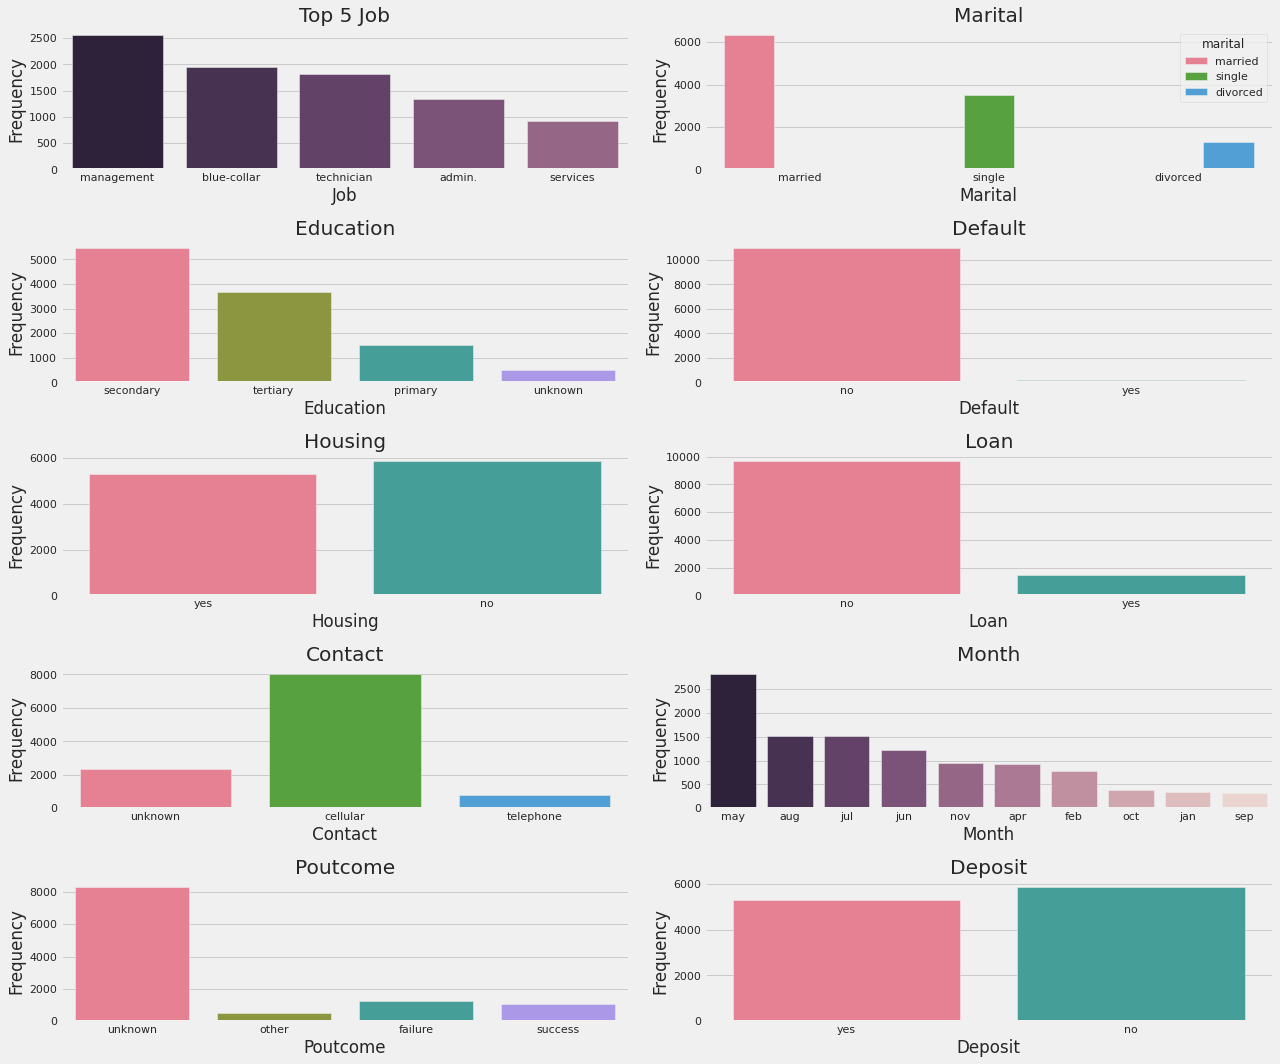

In [ ]:
# cat_feature = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','month', 'poutcome', 'deposit']
cat_feature = df_cat.columns

f,ax = plt.subplots(5,2,figsize=(18,15))


g = sns.barplot(x='job', y ='FREQ', data=job, ax=ax[0,0], palette=sns.cubehelix_palette(reverse=True, start=0, n_colors=10))
ax[0,0].set_title('Top 5 Job')
ax[0,0].set_xlabel('Job')
ax[0,0].set_ylabel('Frequency')

g = sns.countplot('marital',data=df, hue = 'marital', palette='husl', ax=ax[0,1])
ax[0,1].set_title('Marital')
ax[0,1].set_xlabel('Marital')
ax[0,1].set_ylabel('Frequency')

g = sns.countplot('education',data=df,palette='husl', ax=ax[1,0])
ax[1,0].set_title('Education')
ax[1,0].set_xlabel('Education')
ax[1,0].set_ylabel('Frequency')

# g = sns.barplot(x='default', y ='FREQ', data=default, ax=ax[1,1], palette=sns.cubehelix_palette(reverse=True, start=0, n_colors=10))
g = sns.countplot('default',data=df,palette='husl', ax=ax[1,1])
ax[1,1].set_title('Default')
ax[1,1].set_xlabel('Default')
ax[1,1].set_ylabel('Frequency')

g = sns.countplot('housing',data=df,palette='husl', ax=ax[2,0])
ax[2,0].set_title('Housing')
ax[2,0].set_xlabel('Housing')
ax[2,0].set_ylabel('Frequency')

g = sns.countplot('loan',data=df,palette='husl', ax=ax[2,1])
ax[2,1].set_title('Loan')
ax[2,1].set_xlabel('Loan')
ax[2,1].set_ylabel('Frequency')

g = sns.countplot('contact',data=df,palette='husl', ax=ax[3,0])
ax[3,0].set_title('Contact')
ax[3,0].set_xlabel('Contact')
ax[3,0].set_ylabel('Frequency')

g = sns.barplot(x='month', y ='FREQ', data=month, ax=ax[3,1], palette=sns.cubehelix_palette(reverse=True, start=0, n_colors=10))
# g = sns.countplot('month',data=df,palette='husl', ax=ax[3,1])
ax[3,1].set_title('Month')
ax[3,1].set_xlabel('Month')
ax[3,1].set_ylabel('Frequency')

g = sns.countplot('poutcome',data=df,palette='husl', ax=ax[4,0])
ax[4,0].set_title('Poutcome')
ax[4,0].set_xlabel('Poutcome')
ax[4,0].set_ylabel('Frequency')

g = sns.countplot('deposit',data=df,palette='husl', ax=ax[4,1])
ax[4,1].set_title('Deposit')
ax[4,1].set_xlabel('Deposit')
ax[4,1].set_ylabel('Frequency')


plt.tight_layout()

## Univariate Analysis Numeric

### Box Plot

#### Outliers

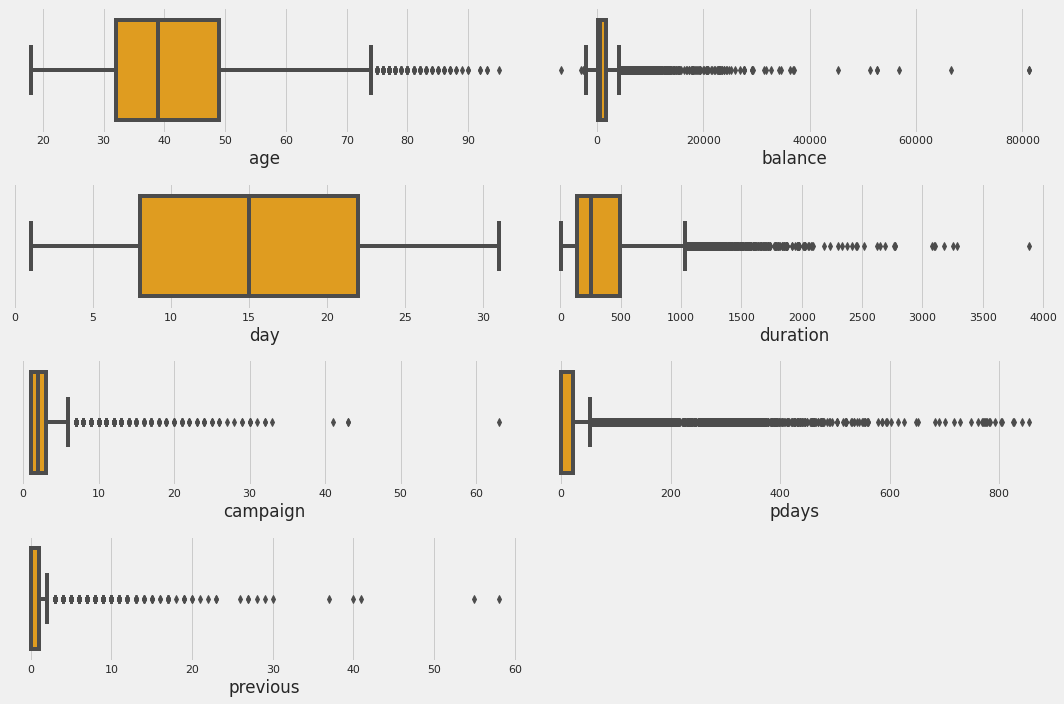

In [ ]:
# boxplot visualization for numerical data

numericals = df_num.columns

plt.figure(figsize=(15, 10))
for i in range(0, len(numericals)):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x=df[numericals[i]], color='orange')
    plt.tight_layout()

plt.show()

Dari pengamatan plot kotak/box plot:

hanya kolom day yang tidak memiliki outliers,
berdasarkan literatur Keberadaan outlier pada dataset dapat menyebabkan rendahnya hasil akurasi pada proses
klasifikasi. Outlier pada dataset dapat dihilangkan
pada tahapan prapemrosesan algoritme klasifikasi, Sinaga dkk. [(Sumber)](https://iopscience.iop.org/article/10.1088/1757-899X/725/1/012122) menyatakan adanya pengaruh outlier
pada klasifikasi algoritme kNN dan mengusulkan
sebuah metode dengan cara mengkombinasikan
beberapa tahapan pada vektor rata-rata lokal kNN dan
jarak harmonic sebagai label untuk data uji. Metode
tersebut dapat meningkatkan hasil akurasi klasifikasi
kNN pada dataset yang memiliki outlier. Alternatif lain
agar akurasi hasil klasifikasi meningkat adalah dengan
menghilangkan outlier pada dataset sebelum proses
(prapemrosesan) klasifikasi

Analisis  klaster  pada  hakekatnya  adalah teknik  algoritma,  bukan  alat  inferensi  statistik. Oleh sebab itu persyaratan seperti distribusi data yang  harus  normal  (di  analisis  statistik  lainnya) ataupun  hubungan  linier  antar  variabel  tidak menjadi  syarat  dalam  analisis  klaster [Link Sumber](http://jurnalsaintek.uinsby.ac.id/index.php/mantik/article/view/263/215)</br>
terlebih seringkali data yang dianggap sebagai oulier sebenarnya adalah suatu data yang penting, contoh pada plot di atas mengunjukkan outlier pada kolom age , namun penulis beranggapan itu mungkin saja dapat terjadi karena cukup banyak orang yang usiannya melebihi 90 tahun, beda cerita jika hanya 1 orang saja</br>
</br>
Selain itu, data yang digunakanseharusnya  tidak  berkorelasi, dengan  kata  lain sebaiknya tidak ada multikolinieritas. Alasannya adalah  di  dalam analisis  klaster  setiap  variabel diberi bobot yang sama dalam perhitungan jarak. Manakala  beberapa  varibel  saling  berkorelasi, korelasi tersebut akan menyebabkan pembobotan   yang   tidak   berimbang   sehingga akan mempengaruhi hasil analisis [Link Sumber](http://jurnalsaintek.uinsby.ac.id/index.php/mantik/article/view/263/215).

namun pada project saat ini tidaklah melakukan klasifikasi melainkan clustering, handling outlier menjadi wajib ketika populasi yang diteliti sedikit, populasi yang digunakan pada dataset ini di anggap cukup banyak sehingga tidak perlu melakukan handling outliers.

### Dist Plot / Distribustion plot

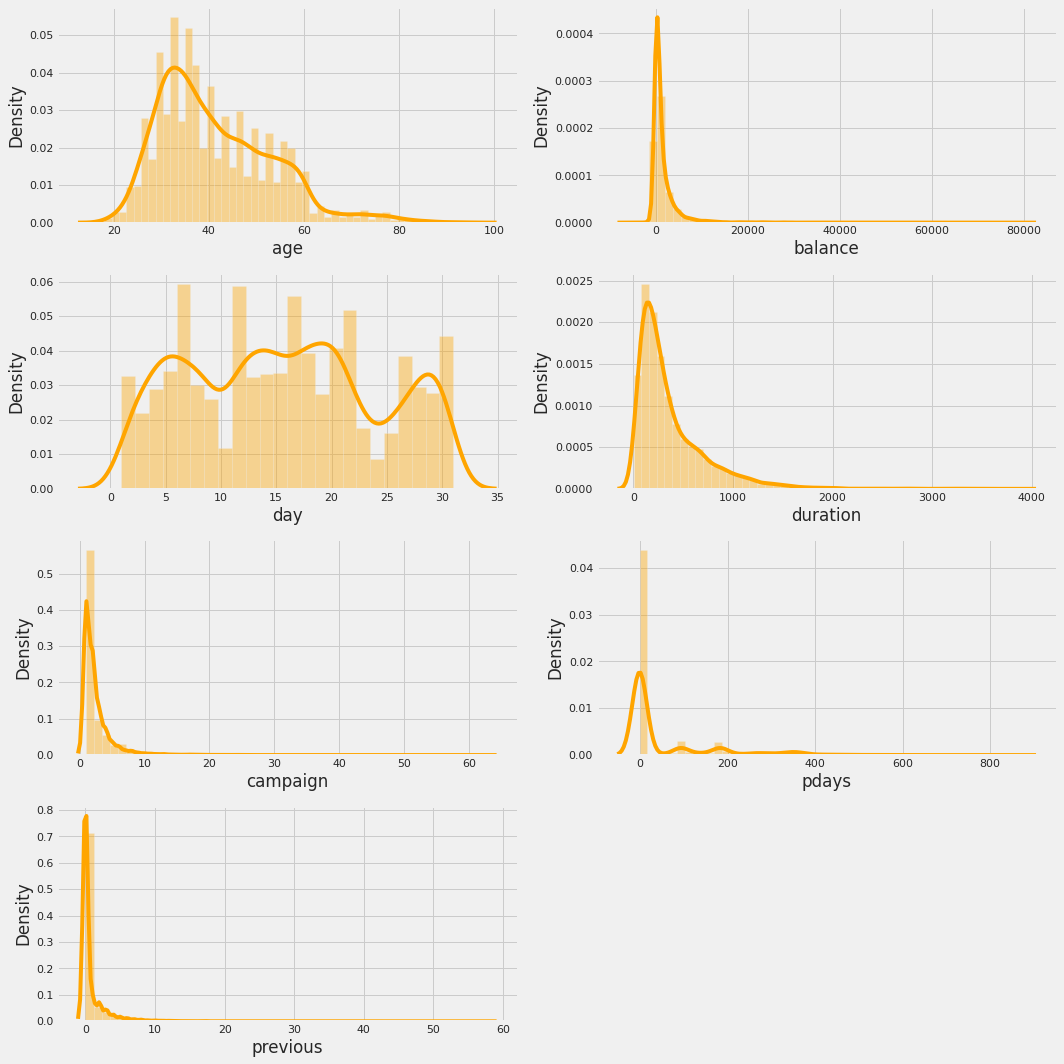

In [ ]:
# distribution plot for numerical data

plt.figure(figsize=(15, 15))
for i in range(0, len(numericals)):
    plt.subplot(4, 2,i+1)
    sns.distplot(df[numericals[i]], color='orange')
    plt.tight_layout()

Dari pengamatan Dist Plot:

semua kolom tampaknya memiliki distribusi miring positif, kolom DAY tanpak seperti memiliki distribusi simetris namun jika dilihat pada satistik deskriftif day menunjukkan miring positif (skewed positif)

## Multivariate Analysis

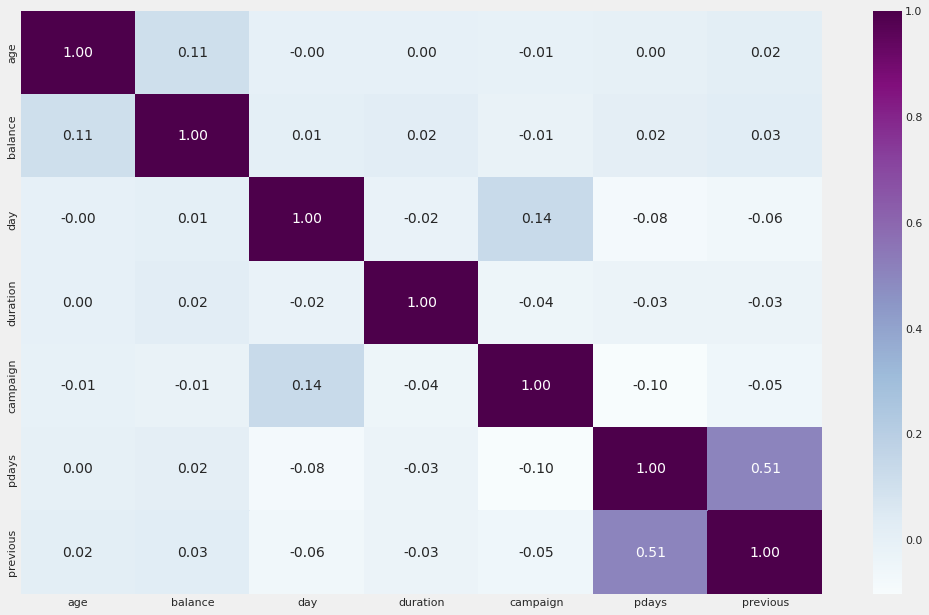

In [ ]:
corr_= df_num.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu")

hubungan antar variabel tidak lebih dari 51 % menunjukkan kecil kemungkinan multikoliniearitas

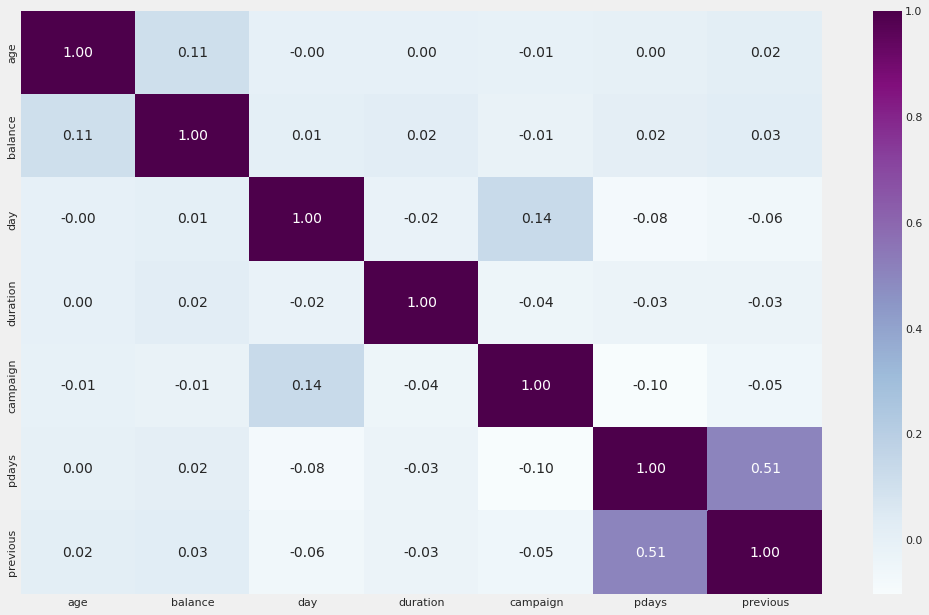

In [ ]:
corr_= df.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu")

hubungan deposit dan campaign adalah terbalik, dimana semakin campaign (semakin banyak dihubungi) maka peluang pelanggan melakukan term deposit semakin mengecil

<Figure size 1152x720 with 0 Axes>

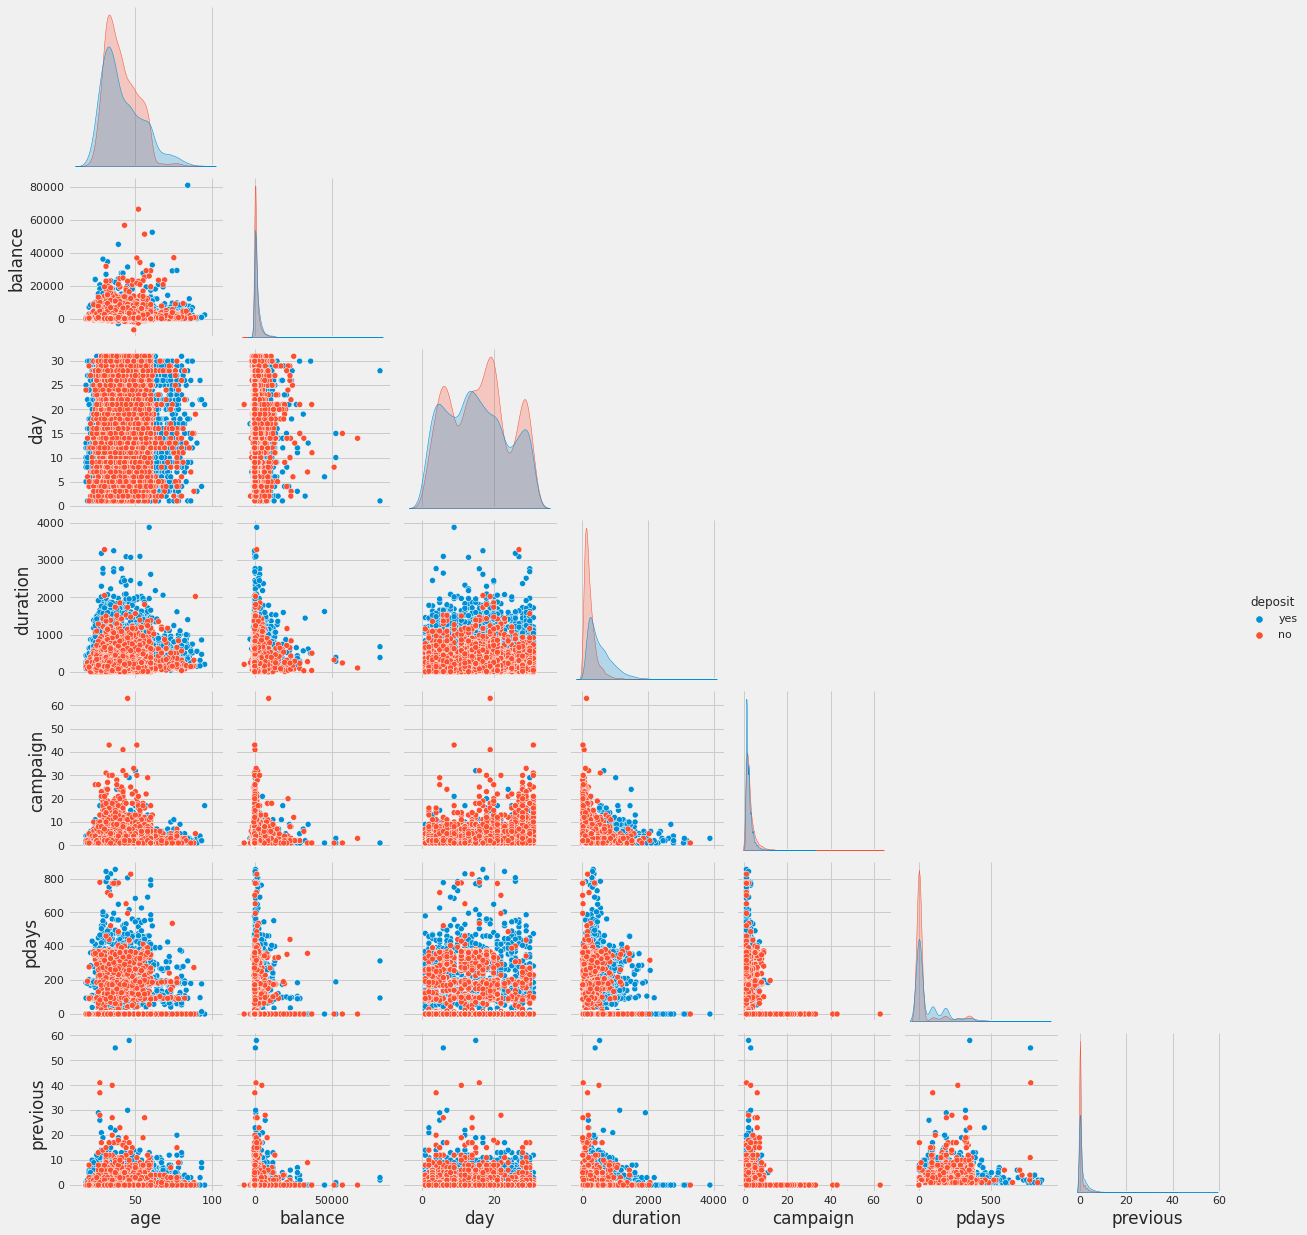

In [ ]:
plt.figure(figsize=(16,10))
sns.pairplot(df,hue='deposit',corner=True)

sekilas terlihat pada beberpa fitur lebih banyak yang tidak melakukan term deposit

In [ ]:
import plotly.express as px

In [ ]:
import plotly.express as px
sample  = df.rename(columns={"balance":"Active Balance","job":"Occupation"})
fig = px.treemap(sample, path=[px.Constant('Active Balance'),'Occupation'], values='Active Balance',
                   hover_data=['Occupation'])
fig.show()

In [ ]:
df.loc[df['job'] == 'management', 'balance'].sum()

4602541

dapat dilihat dari treemap diatas bahwa profesi management memiliki kemunngkinan tertinggi untuk melakukan term deposit karena memiliki saldo yang paling banyak sebesar 4602541 secara total

In [ ]:
sample  = df.rename(columns={"balance":"Active Balance","marital":"Status Pernikahan"})
fig = px.treemap(sample, path=[px.Constant('Active Balance'),'Status Pernikahan'], values='Active Balance',
                   hover_data=['Status Pernikahan'])
fig.show()

dapat dilihat dari treemap diatas bahwa seorang yang memiliki status nikah memiliki kemunngkinan tertinggi untuk melakukan term deposit karena memiliki saldo yang paling banyak sebesar 10161140 secara total

In [ ]:
sample  = df.rename(columns={"balance":"Active Balance","age":"Umur"})
fig = px.treemap(sample, path=[px.Constant('Active Balance'),'Umur'], values='Active Balance',
                   hover_data=['Umur'])
fig.show()

dapat dilihat dari treemap diatas bahwa umur skitar 30 an serta yang status married memiliki kemunngkinan tertinggi untuk melakukan deposit

In [ ]:
sample  = df.rename(columns={"balance":"Active Balance","education":"Pendidikan"})
fig = px.treemap(sample, path=[px.Constant('Active Balance'),'Pendidikan'], values='Active Balance',
                   hover_data=['Pendidikan'])
fig.show()

dapat dilihat dari treemap diatas bahwa pendidikan pada tingkat secondary memiliki kemunngkinan tertinggi untuk melakukan deposit karena balancenya paling tinggi pada kategori secondary

In [ ]:
sample  = df.rename(columns={"balance":"Active Balance","loan":"Loans"})
fig = px.treemap(sample, path=[px.Constant('Active Balance'),'Loans'], values='Active Balance',
                   hover_data=['Loans'])
fig.show()

dapat dilihat dari treemap diatas bahwa orang yang tidak memiliki loan memiliki kemunngkinan tertinggi untuk melakukan deposit karna balance/saldonya sangat besar daripada yang mimiliki loan(pinjaman)

# Data Preprocessing

## Missing Values

In [ ]:
data = df

In [ ]:
data_missing_value = data.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(data))*100,2)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage


Tidak ada mising value pada dataset, lanjut cek duplikat

## Duplicate Values

In [ ]:
data.duplicated().sum()

0

Tidak ada duplicates rows pada dataset.

# melihat unik values pada semua kolom

In [ ]:
rows = []
for col in df :
  rows.append(
        {
            'Nama Kolom': col,
            'Jumlah Unique Values': len(df[col].unique()),
            'Unique Values':  df[col].unique()

        }
  )
# pd.options.display.max_colwidth = 100 #maksimal tampil 100 karakter
pd.options.display.max_colwidth = 70 #maksimal tampil 70 karakter
# pd.options.display.max_colwidth #tanpa batas 
unik = pd.DataFrame(rows)
unik.sort_values(by='Jumlah Unique Values', ascending=True).reset_index().drop('index', 1)


,Nama Kolom,Jumlah Unique Values,Unique Values
0,deposit,2,"[yes, no]"
1,loan,2,"[no, yes]"
2,housing,2,"[yes, no]"
3,default,2,"[no, yes]"
4,contact,3,"[unknown, cellular, telephone]"
5,marital,3,"[married, single, divorced]"
6,poutcome,4,"[unknown, other, failure, success]"
7,education,4,"[secondary, tertiary, primary, unknown]"
8,job,12,"[admin., technician, services, management, retired, blue-collar, u..."
9,month,12,"[may, jun, jul, aug, oct, nov, dec, jan, feb, mar, apr, sep]"


# K-Prototypes with Scaling data Numericals - Customer Clustering with Mixed Data Types

In [ ]:
data = df

In [ ]:
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
# Get the position of categorical columns
df = data
catColumnsPos = [df.columns.get_loc(col) for col in list(df.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(df.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']
Categorical columns position  : [1, 2, 3, 4, 6, 7, 8, 10, 15, 16]


In [ ]:
numColumnsPos = [df.columns.get_loc(col) for col in list(df.select_dtypes(exclude= 'object' ).columns)]
print('numerical columns           : {}'.format(list(df.select_dtypes(exclude= 'object' ).columns)))
print('numerical columns position  : {}'.format(numColumnsPos))

numerical columns           : ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
numerical columns position  : [0, 5, 9, 11, 12, 13, 14]


In [ ]:
numcolumns = list(df.select_dtypes(exclude= 'object' ).columns)

In [ ]:
numcolumns

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

Penting! Dalam kasus nyata, kolom numerik akan memiliki skala yang berbeda sehingga Anda harus menormalkannya menggunakan teknik yang sesuai, seperti normalisasi min-max, Normalisasi Z-Score, dll.

In [ ]:
from sklearn import preprocessing
df_norm = df.copy()
scaler = preprocessing.MinMaxScaler()
df_norm[numcolumns] = scaler.fit_transform(df_norm[numcolumns])

In [ ]:
df_norm.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,0.532468,admin.,married,secondary,no,0.104371,yes,no,unknown,0.133333,may,0.268110,0.000000,0.0,0.0,unknown,yes
1,0.493506,admin.,married,secondary,no,0.078273,no,no,unknown,0.133333,may,0.377675,0.000000,0.0,0.0,unknown,yes
2,0.298701,technician,married,secondary,no,0.092185,yes,no,unknown,0.133333,may,0.357566,0.000000,0.0,0.0,unknown,yes
3,0.480519,services,married,secondary,no,0.105882,yes,no,unknown,0.133333,may,0.148750,0.000000,0.0,0.0,unknown,yes
4,0.467532,admin.,married,tertiary,no,0.079851,no,no,unknown,0.133333,may,0.172983,0.016129,0.0,0.0,unknown,yes


In [ ]:
pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from kmodes.kprototypes import KPrototypes

In [ ]:
#memastikan dalam bentuk float, karena harus float
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11162 non-null  float64
 1   job        11162 non-null  object 
 2   marital    11162 non-null  object 
 3   education  11162 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11162 non-null  float64
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  float64
 10  month      11162 non-null  object 
 11  duration   11162 non-null  float64
 12  campaign   11162 non-null  float64
 13  pdays      11162 non-null  float64
 14  previous   11162 non-null  float64
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  object 
dtypes: float64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
numColumnsPos = [df.columns.get_loc(col) for col in list(df.select_dtypes(exclude= 'object' ).columns)]
print('numerical columns           : {}'.format(list(df.select_dtypes(exclude= 'object' ).columns)))
print('numerical columns position  : {}'.format(numColumnsPos))

numerical columns           : ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
numerical columns position  : [0, 5, 9, 11, 12, 13, 14]


In [ ]:
# jika blm float , maka gunakan kode dibawah untuk merubahnya menjadi float
my_array  = df_norm.values
my_array[:,0]=my_array[:,0].astype(float)
my_array[:,5]=my_array[:,5].astype(float)
my_array[:,9]=my_array[:,9].astype(float)
my_array[:,11]=my_array[:,11].astype(float)
my_array[:,12]=my_array[:,12].astype(float)
my_array[:,13]=my_array[:,13.astype(float)
my_array[:,14]=my_array[:,14].astype(float)
my_array

In [ ]:
my_array  = df_norm.values
my_array

array([[0.5324675324675325, 'admin.', 'married', ..., 0.0, 'unknown',
        'yes'],
       [0.4935064935064935, 'admin.', 'married', ..., 0.0, 'unknown',
        'yes'],
       [0.29870129870129875, 'technician', 'married', ..., 0.0,
        'unknown', 'yes'],
       ...,
       [0.18181818181818182, 'technician', 'single', ..., 0.0, 'unknown',
        'no'],
       [0.32467532467532473, 'technician', 'married', ...,
        0.08620689655172414, 'failure', 'no'],
       [0.2077922077922078, 'technician', 'married', ..., 0.0, 'unknown',
        'no']], dtype=object)

In [ ]:
model =KPrototypes(n_clusters=3,verbose=2, max_iter=1000)
klaster= model.fit_predict(my_array,categorical=[1, 2, 3, 4, 6, 7, 8, 10, 15, 16])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/1000, moves: 2772, ncost: 4973.001537067357
Run: 1, iteration: 2/1000, moves: 1104, ncost: 4966.541670056984
Run: 1, iteration: 3/1000, moves: 217, ncost: 4965.313506460919
Run: 1, iteration: 4/1000, moves: 292, ncost: 4944.8862978172365
Run: 1, iteration: 5/1000, moves: 150, ncost: 4944.791144646734
Run: 1, iteration: 6/1000, moves: 10, ncost: 4944.7878597550525
Run: 1, iteration: 7/1000, moves: 2, ncost: 4944.787608772646
Run: 1, iteration: 8/1000, moves: 2, ncost: 4944.787429275945
Run: 1, iteration: 9/1000, moves: 0, ncost: 4944.787429275945
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/1000, moves: 2680, ncost: 5117.84051367653
Run: 2, iteration: 2/1000, moves: 1726, ncost: 5029.760778975459
Run: 2, iteration: 3/1000, moves: 722, ncost: 5012.76948702961

In [ ]:
print(model.cluster_centroids_)

[['0.2895223183705432' '0.09167466662552581' '0.4221528525295902'
  '0.08178458654159182' '0.023341088232230037' '0.061681365235837914'
  '0.012323224824616681' 'blue-collar' 'married' 'secondary' 'no' 'yes'
  'no' 'cellular' 'may' 'unknown' 'no']
 ['0.28350665035447614' '0.09859536279945845' '0.30771940418679644'
  '0.10547706403737211' '0.019869097709209638' '0.06855736361838564'
  '0.017772363818090848' 'management' 'single' 'tertiary' 'no' 'no' 'no'
  'cellular' 'aug' 'unknown' 'yes']
 ['0.33819721620033605' '0.09652696491614592' '0.7718252730109295'
  '0.10466293361711208' '0.030370892255044652' '0.052917316692667776'
  '0.01376620582064662' 'technician' 'married' 'secondary' 'no' 'no' 'no'
  'cellular' 'jul' 'unknown' 'yes']]


In [ ]:
cluster_dict=[]
for c in klaster:
  cluster_dict.append(c)

In [ ]:
df_norm['cluster'] = cluster_dict
df_norm

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,cluster
0,0.532468,admin.,married,secondary,no,0.104371,yes,no,unknown,0.133333,may,0.268110,0.000000,0.000000,0.000000,unknown,yes,0
1,0.493506,admin.,married,secondary,no,0.078273,no,no,unknown,0.133333,may,0.377675,0.000000,0.000000,0.000000,unknown,yes,0
2,0.298701,technician,married,secondary,no,0.092185,yes,no,unknown,0.133333,may,0.357566,0.000000,0.000000,0.000000,unknown,yes,0
3,0.480519,services,married,secondary,no,0.105882,yes,no,unknown,0.133333,may,0.148750,0.000000,0.000000,0.000000,unknown,yes,0
4,0.467532,admin.,married,tertiary,no,0.079851,no,no,unknown,0.133333,may,0.172983,0.016129,0.000000,0.000000,unknown,yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,0.194805,blue-collar,single,primary,no,0.077773,yes,no,cellular,0.633333,apr,0.065739,0.000000,0.000000,0.000000,unknown,no,0
11158,0.272727,services,married,secondary,no,0.086086,no,no,unknown,0.500000,jun,0.020882,0.048387,0.000000,0.000000,unknown,no,0
11159,0.181818,technician,single,secondary,no,0.078091,no,no,cellular,0.600000,aug,0.039701,0.016129,0.000000,0.000000,unknown,no,2
11160,0.324675,technician,married,secondary,no,0.077762,no,yes,cellular,0.233333,may,0.001805,0.016129,0.202339,0.086207,failure,no,0


# K-Prototypes tanpa Scaling data Numericals - Customer Clustering with Mixed Data Types

In [ ]:
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
# Get the position of categorical columns
df = data
catColumnsPos = [df.columns.get_loc(col) for col in list(df.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(df.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']
Categorical columns position  : [1, 2, 3, 4, 6, 7, 8, 10, 15, 16]


In [ ]:
numColumnsPos = [df.columns.get_loc(col) for col in list(df.select_dtypes(exclude= 'object' ).columns)]
print('numerical columns           : {}'.format(list(df.select_dtypes(exclude= 'object' ).columns)))
print('numerical columns position  : {}'.format(numColumnsPos))

numerical columns           : ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
numerical columns position  : [0, 5, 9, 11, 12, 13, 14]


In [ ]:
numcolumns = list(df.select_dtypes(exclude= 'object' ).columns)

In [ ]:
numcolumns

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [ ]:
pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from kmodes.kprototypes import KPrototypes

In [ ]:
df_copy = data.copy()

In [ ]:
#memastikan dalam bentuk float, karena harus float
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
numColumnsPos = [df_copy.columns.get_loc(col) for col in list(df_copy.select_dtypes(exclude= 'object' ).columns)]
print('numerical columns           : {}'.format(list(df_copy.select_dtypes(exclude= 'object' ).columns)))
print('numerical columns position  : {}'.format(numColumnsPos))

numerical columns           : ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
numerical columns position  : [0, 5, 9, 11, 12, 13, 14]


In [ ]:
# jika blm float , maka gunakan kode dibawah untuk merubahnya menjadi float
my_array  = df_norm.values
my_array[:,0]=my_array[:,0].astype(float)
my_array[:,5]=my_array[:,5].astype(float)
my_array[:,9]=my_array[:,9].astype(float)
my_array[:,11]=my_array[:,11].astype(float)
my_array[:,12]=my_array[:,12].astype(float)
my_array[:,13]=my_array[:,13].astype(float)
my_array[:,14]=my_array[:,14].astype(float)
my_array

array([[0.5324675324675325, 'admin.', 'married', ..., 'unknown', 'yes',
        0],
       [0.4935064935064935, 'admin.', 'married', ..., 'unknown', 'yes',
        0],
       [0.29870129870129875, 'technician', 'married', ..., 'unknown',
        'yes', 0],
       ...,
       [0.18181818181818182, 'technician', 'single', ..., 'unknown',
        'no', 2],
       [0.32467532467532473, 'technician', 'married', ..., 'failure',
        'no', 0],
       [0.2077922077922078, 'technician', 'married', ..., 'unknown',
        'no', 0]], dtype=object)

In [ ]:
model =KPrototypes(n_clusters=3,verbose=2, max_iter=1000)
klaster= model.fit_predict(my_array,categorical=[1, 2, 3, 4, 6, 7, 8, 10, 15, 16])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/1000, moves: 2426, ncost: 8824.612039378053
Run: 1, iteration: 2/1000, moves: 119, ncost: 8820.369993903103
Run: 1, iteration: 3/1000, moves: 0, ncost: 8820.369993903103
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/1000, moves: 1608, ncost: 8820.369993903108
Run: 2, iteration: 2/1000, moves: 0, ncost: 8820.369993903108
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/1000, moves: 686, ncost: 8820.369993903103
Run: 3, iteration: 2/1000, moves: 0, ncost: 8820.369993903103
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/1000, moves: 1161, ncost: 11993.451607042887
Run: 4, iteration: 2/1000, moves: 2936, ncost: 9175.519806151626
Run: 4, iteration: 3/1000, mo

In [ ]:
print(model.cluster_centroids_)

[['0.3381972162003373' '0.09652696491614551' '0.7718252730109344'
  '0.10466293361711272' '0.030370892255044638' '0.052917316692667735'
  '0.013766205820646605' '2.0' 'technician' 'married' 'secondary' 'no'
  'no' 'no' 'cellular' 'jul' 'unknown' 'yes']
 ['0.2835066503544744' '0.09859536279945788' '0.30771940418678695'
  '0.10547706403737209' '0.019869097709209593' '0.06855736361838553'
  '0.017772363818090848' '1.0' 'management' 'single' 'tertiary' 'no' 'no'
  'no' 'cellular' 'aug' 'unknown' 'yes']
 ['0.28952231837054093' '0.09167466662552666' '0.4221528525296083'
  '0.08178458654159115' '0.023341088232229426' '0.06168136523583804'
  '0.01232322482461673' '0.0' 'blue-collar' 'married' 'secondary' 'no'
  'yes' 'no' 'cellular' 'may' 'unknown' 'no']]


In [ ]:
cluster_dict=[]
for c in klaster:
  cluster_dict.append(c)

In [ ]:
df_norm['cluster'] = cluster_dict
df_norm

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,cluster
0,0.532468,admin.,married,secondary,no,0.104371,yes,no,unknown,0.133333,may,0.268110,0.000000,0.000000,0.000000,unknown,yes,2
1,0.493506,admin.,married,secondary,no,0.078273,no,no,unknown,0.133333,may,0.377675,0.000000,0.000000,0.000000,unknown,yes,2
2,0.298701,technician,married,secondary,no,0.092185,yes,no,unknown,0.133333,may,0.357566,0.000000,0.000000,0.000000,unknown,yes,2
3,0.480519,services,married,secondary,no,0.105882,yes,no,unknown,0.133333,may,0.148750,0.000000,0.000000,0.000000,unknown,yes,2
4,0.467532,admin.,married,tertiary,no,0.079851,no,no,unknown,0.133333,may,0.172983,0.016129,0.000000,0.000000,unknown,yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,0.194805,blue-collar,single,primary,no,0.077773,yes,no,cellular,0.633333,apr,0.065739,0.000000,0.000000,0.000000,unknown,no,2
11158,0.272727,services,married,secondary,no,0.086086,no,no,unknown,0.500000,jun,0.020882,0.048387,0.000000,0.000000,unknown,no,2
11159,0.181818,technician,single,secondary,no,0.078091,no,no,cellular,0.600000,aug,0.039701,0.016129,0.000000,0.000000,unknown,no,0
11160,0.324675,technician,married,secondary,no,0.077762,no,yes,cellular,0.233333,may,0.001805,0.016129,0.202339,0.086207,failure,no,2


# Agglomerative Clustering

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


# Normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from datetime import datetime

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder

In [ ]:
# load data from google

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/final project ds dibimbing.id/bank.csv')
full_data = df.copy()
full_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
# data = data.drop('deposit', axis=1) #jika deposit ingin di drop

In [ ]:
data_agglomerative = full_data.copy()

In [ ]:
data_agglomerative = data_agglomerative.drop(list(df.select_dtypes('object').columns),axis=1)

In [ ]:
data_agglomerative.head(5)

,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0


## Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
sc_data = StandardScaler()
data_std = sc_data.fit_transform(data_agglomerative.astype(float))

In [ ]:
type(data_std)

numpy.ndarray

## Evaluasi

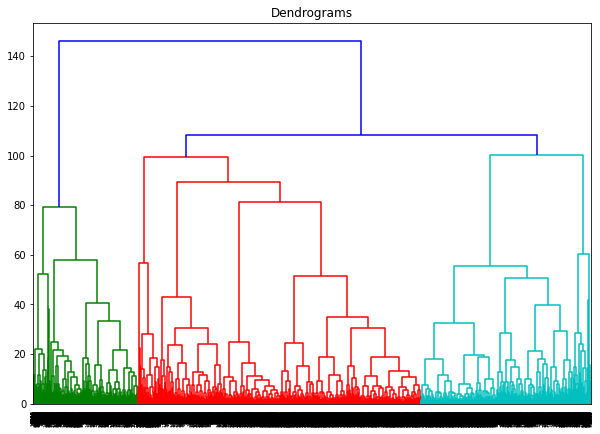

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_std, method='ward'))
# plt.axhline(y=6, color='r', linestyle='--')

## Modeling

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage,dendrogram

In [ ]:
model = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "ward").fit(data_std)

In [ ]:
df_data_std = pd.DataFrame(data=data_std, columns=list(data_agglomerative))
df_data_std.head(3)

,age,balance,day,duration,campaign,pdays,previous
0,1.491505,0.252525,-1.265746,1.930226,-0.554168,-0.481184,-0.36326
1,1.239676,-0.459974,-1.265746,3.154612,-0.554168,-0.481184,-0.36326
2,-0.019470,-0.080160,-1.265746,2.929901,-0.554168,-0.481184,-0.36326


In [ ]:
# model.predict(data_test)

In [ ]:
df_data_std['clusters'] = model.labels_
data_agglomerative['clusters'] = model.labels_

## Insight

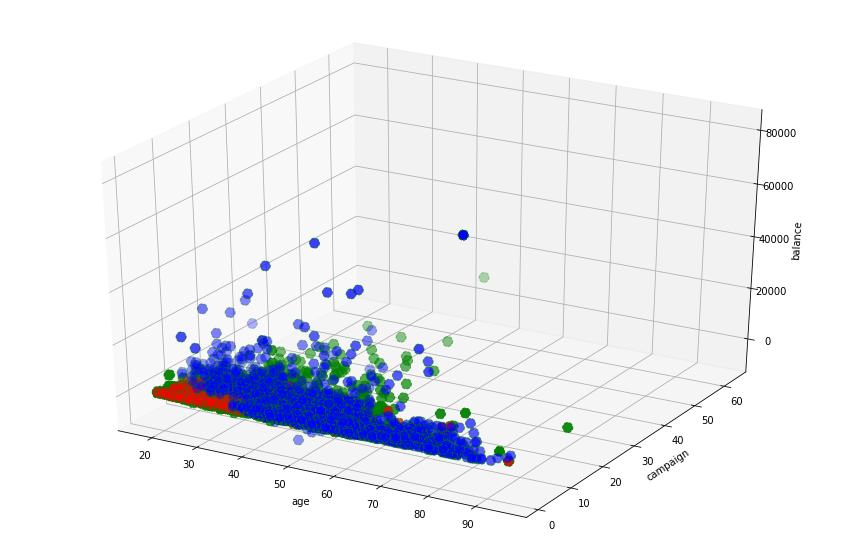

In [ ]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_agglomerative.age[data_agglomerative.clusters == 0], data_agglomerative["campaign"][data_agglomerative.clusters == 0], data_agglomerative["balance"][data_agglomerative.clusters == 0], c='blue', s=100, edgecolor='green',linestyle='--')
ax.scatter(data_agglomerative.age[data_agglomerative.clusters == 1], data_agglomerative["campaign"][data_agglomerative.clusters == 1], data_agglomerative["balance"][data_agglomerative.clusters == 1], c='red', s=100, edgecolor='green',linestyle='--')
ax.scatter(data_agglomerative.age[data_agglomerative.clusters == 2], data_agglomerative["campaign"][data_agglomerative.clusters == 2], data_agglomerative["balance"][data_agglomerative.clusters == 2], c='green', s=100, edgecolor='green',linestyle='--')
ax.scatter(data_agglomerative.age[data_agglomerative.clusters == 3], data_agglomerative["campaign"][data_agglomerative.clusters == 3], data_agglomerative["balance"][data_agglomerative.clusters == 3], c='black', s=100, edgecolor='green',linestyle='--')


plt.xlabel("age")
plt.ylabel("campaign")
ax.set_zlabel('balance')
plt.show()

**Karena sulit melihat hasil clustering pada visualisasi 3d maka kita akan visualisasi 2d menggunakan PCA**

In [ ]:
pca = PCA(n_components=2)

pca.fit(data_std)
pcs = pca.transform(data_std)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters'] = data_agglomerative['clusters']
data_pca.head()

,PC 1,PC 2,clusters
0,-0.150871,2.384279,0
1,-0.254230,2.340486,0
2,-0.274670,1.813657,0
3,-0.112904,1.730300,0
4,-0.259571,1.263798,0


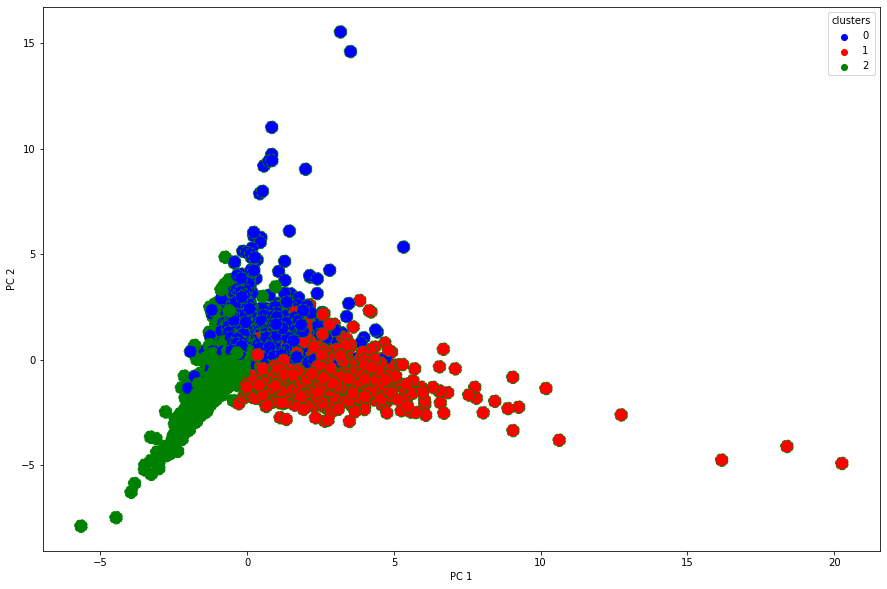

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='green',
    linestyle='--',
    data=data_pca,
    palette=['blue','red','green'],
    s=160,
    ax=ax
)

In [ ]:
display(data_agglomerative.groupby('clusters').agg(['mean','median']))

age             balance               day           duration  \
               mean median         mean median       mean median        mean   
clusters                                                                       
0         52.112974   51.0  2713.052663  898.0  12.924684   13.0  332.970580   
1         37.510984   35.0  1113.159026  580.5  14.244508   14.0  355.101242   
2         36.082378   34.0   971.763274  419.0  17.819016   18.0  401.630975   

                 campaign              pdays         previous         
         median      mean median        mean median      mean median  
clusters                                                              
0         233.0  1.978229    2.0   32.113563   -1.0  0.504854    0.0  
1         267.0  1.942216    1.0  223.204871  185.0  3.597421    2.0  
2         265.0  3.035456    2.0   -0.634151   -1.0  0.007762    0.0

# Kmeans Clustering

In [ ]:
full_data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
# data = data.drop('deposit', axis=1) #jika deposit ingin di drop

In [ ]:
data_kmeans = full_data.copy()

In [ ]:
data_kmeans = data_kmeans.drop(list(df.select_dtypes('object').columns),axis=1)

In [ ]:
data_kmeans.head(5)

,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


# Normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from datetime import datetime

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder

## Scaling

In [ ]:
sc_data = StandardScaler()
data_std = sc_data.fit_transform(data_kmeans.astype(float))

## Modeling

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(data_std)

In [ ]:
df_data_std = pd.DataFrame(data=data_std, columns=list(data_kmeans))

In [ ]:
df_data_std['clusters'] = kmeans.labels_
data_kmeans['clusters'] = kmeans.labels_

In [ ]:
data_kmeans.head(3)

,age,balance,day,duration,campaign,pdays,previous,clusters
0,59,2343,5,1042,1,-1,0,0
1,56,45,5,1467,1,-1,0,0
2,41,1270,5,1389,1,-1,0,0


## Evaluasi

### Inertia

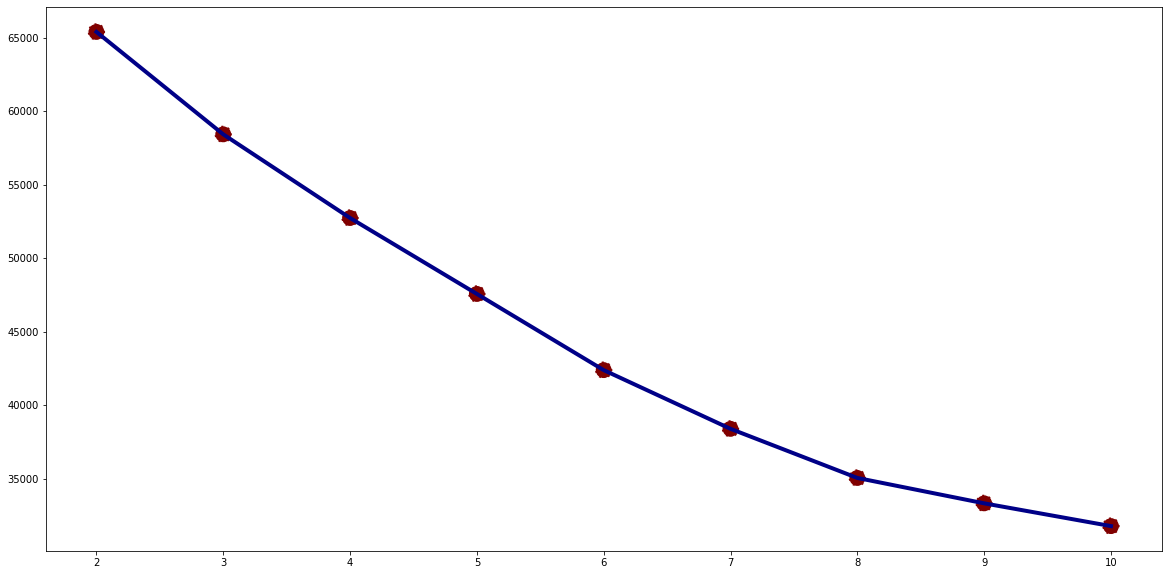

In [ ]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_std)
    inertia.append(kmeans.inertia_)



plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')


### Silhouette score

In [ ]:
range_n_clusters = list(range(2,11))
print(range_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9, 10]


In [ ]:
arr_silhouette_score_mahalanobis = []
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(data_std)
    preds = kmeans.predict(data_std)
    
    score_mahalanobis = silhouette_score(data_std, preds, metric='mahalanobis')
    arr_silhouette_score_mahalanobis.append(score_mahalanobis)
    
    score_euclidean = silhouette_score(data_std, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

## Insight 

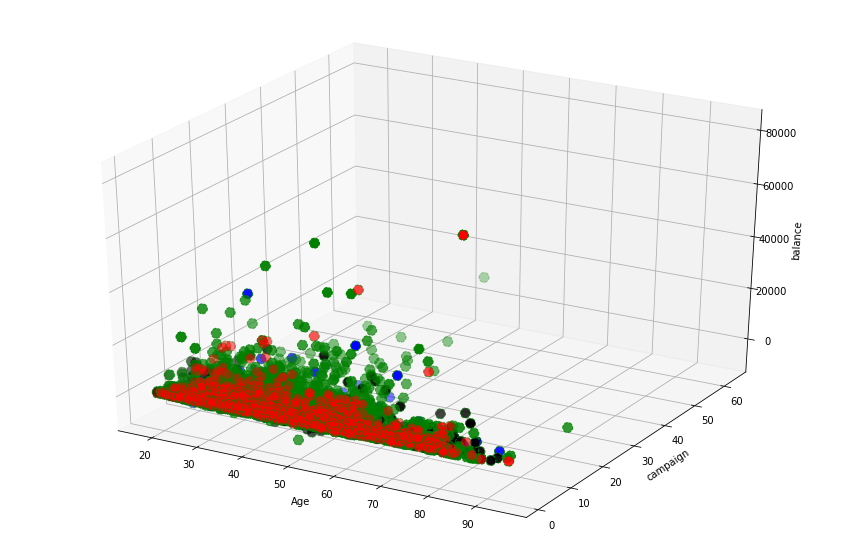

In [ ]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_kmeans.age[data_kmeans.clusters == 0], data_kmeans["campaign"][data_kmeans.clusters == 0], data_kmeans["balance"][data_kmeans.clusters == 0], c='blue', s=100, edgecolor='green',linestyle='--')
ax.scatter(data_kmeans.age[data_kmeans.clusters == 1], data_kmeans["campaign"][data_kmeans.clusters == 1], data_kmeans["balance"][data_kmeans.clusters == 1], c='red', s=100, edgecolor='green',linestyle='--')
ax.scatter(data_kmeans.age[data_kmeans.clusters == 2], data_kmeans["campaign"][data_kmeans.clusters == 2], data_kmeans["balance"][data_kmeans.clusters == 2], c='green', s=100, edgecolor='green',linestyle='--')
ax.scatter(data_kmeans.age[data_kmeans.clusters == 3], data_kmeans["campaign"][data_kmeans.clusters == 3], data_kmeans["balance"][data_kmeans.clusters == 3], c='black', s=100, edgecolor='green',linestyle='--')


plt.xlabel("Age")
plt.ylabel("campaign")
ax.set_zlabel('balance')
plt.show()

**Karena sulit melihat hasil clustering pada visualisasi 3d maka kita akan visualisasi 2d menggunakan PCA**

In [ ]:
pca = PCA(n_components=2)

pca.fit(data_std)
pcs = pca.transform(data_std)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters'] = data_kmeans['clusters']
data_pca.head()

,PC 1,PC 2,clusters
0,-0.150871,2.384279,0
1,-0.254230,2.340486,0
2,-0.274670,1.813657,0
3,-0.112904,1.730300,3
4,-0.259571,1.263798,3


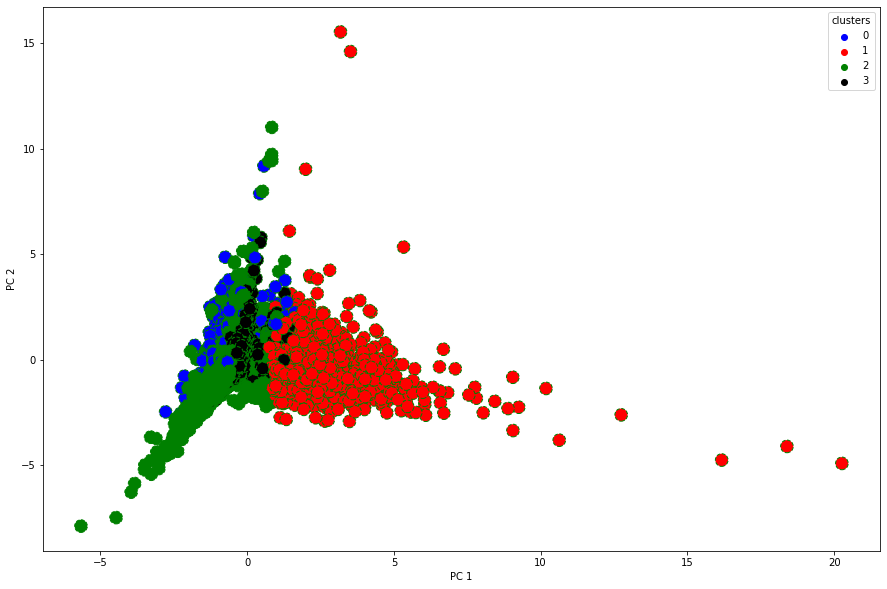

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='green',
    linestyle='--',
    data=data_pca,
    palette=['blue','red','green','black'],
    s=160,
    ax=ax
)

In [ ]:
display(data_kmeans.groupby('clusters').agg(['mean','median']))

age             balance               day            duration  \
               mean median         mean median       mean median         mean   
clusters                                                                        
0         40.957727   39.0  1568.757450  638.0  15.954262   16.0  1058.331947   
1         41.866344   39.0  1766.926877  706.0  14.176271   14.0   333.459564   
2         40.723751   38.0  1718.838365  526.0  23.610206   23.0   240.352391   
3         41.484531   39.0  1205.705446  475.0   8.720532    8.0   265.095628   

                 campaign              pdays         previous         
         median      mean median        mean median      mean median  
clusters                                                              
0         968.0  2.524602    2.0   10.225225   -1.0  0.161469    0.0  
1         268.0  1.935109    1.0  242.011138  196.0  3.828087    3.0  
2         192.0  3.334758    2.0    7.131713   -1.0  0.131445    0.0  
3         221.0  2.014319    2.0    8.117617   -1.0  0.169522    0.0

# Rekomendasi untuk Marketing Dept

demi tercapainya peningkatan pelanggan yg melakukan term deposit, maka pertimbangkan beberapa hal sebagai berikut :</br>
*   Pertimbangkan untuk malakukan kampanye pada usia 30 an.
*   Pertimbangkan untuk malakukan kampanye pada pasangan yang tidak bercerai.
*   Pertimbangkan untuk melakukan kampanye pada pelanggan yang tidak memiliki Loans(Pinjaman) serta menghindari pelanggan yg memiliki pinjaman.</br>
*   Pertimbangkan untuk melihat tingkat saldo pada setiap profesi, usahakan untuk lebih banyak mendekati pelanggan yg bekerja di rana management.</br>
*   Tidak disarankan untuk campaign (menghubungi) pelanggan terlalu sering, karena semakin banyak menghubungi(melakukan kampanye/iklan) kepada pelanggan maka kesempatan utk pelanggan tersebut melakukan term deposit semakin mengecil.




# Note
dapat dilihat model agglomerative clustering penulis beranggapan cluster ideal terbagi menjadi 3 cluster, pada model agglomerative  dan K-means, fitur kategorik di drop karena model tersbut hanya untuk data numerikal kontinu, sedangakan untuk dapat menghandle data mix (data kategori dan kontinu) penulis menggunakan K-prototypes sebagai jalan keluar. 